In [1]:
!pip install --upgrade openpyxl
!pip install --upgrade xlrd

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 96 kB 2.4 MB/s 
  Attempting uninstall: xlrd
    Found existing installation: xlrd 1.1.0
    Uninstalling xlrd-1.1.0:
      Successfully uninstalled xlrd-1.1.0


In [2]:
import math
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
from tqdm import tqdm
import matplotlib.pyplot as plt

In [3]:
class LogisticRegression:
    
    def __init__(self,X,y,learningRate=0.00001, tolerance=0.00005,maxIteration=5000,index=[],rem_idx=False):
        super().__init__()
        
        self.X=X
        self.y=y
        self.learningRate=learningRate
        self.tolerance=tolerance
        self.maxIteration=maxIteration
        self.index=index
        self.rem_idx=rem_idx
        
    #Add intercept
    def add_XO(self):
        return np.column_stack([np.ones([X.shape[0],1]),X])
    
    def sigmoid(self,z):
        sig=1/(1+np.exp(-z))
        return sig
    
    #for cost function, you can write either of 2-J(0) or negative of log likelihood
    def costFunction(self,X,y):
        pred_=np.log(np.ones(X.shape[0])+np.exp(X.dot(self.w)))-X.dot(self.w).dot(y)
        cost=pred_.sum()
        return cost
    
    def gradient(self,X,y):
        sigmoid=self.sigmoid(X.dot(self.w))
        grad=(sigmoid-y).dot(X)
        return grad
    #You get one gradient per dimension so we will not take summation here.
    
    
    def gradientDescent(self, X,y):
        errors=[]
        last=float('inf')
        
        for i in tqdm(range(self.maxIteration)):
            self.w=self.w-self.learningRate*self.gradient(X,y)
            curr=self.costFunction(X,y)
            
            diff=last-curr
            last=curr
            
            errors.append(curr)
            
            if diff<self.tolerance:
                print("The model stopped lesrning")
                break
        self.plot_cost(errors)
        return     

            
    def predict(self,X):
        pred=self.sigmoid(X.dot(self.w))
        return np.around(pred)
            

    def evaluate(self,y,y_hat):
        y=(y==1)       #true or false
        y_hat=(y_hat==1)
            
        accuracy=(y==y_hat).sum()/y.size
        precision=(y&y_hat).sum()/y_hat.sum()
        recall=(y&y_hat).sum()/y.sum()
            
        return recall,precision, accuracy
        
    def remove_index(self,index,X,y):
        
        self.X=np.delete(self.X,index,0)
        self.y=np.delete(self.y,index,0)
        return self.X, self.y
        
    def fit(self):
        
        if self.rem_idx== True:
            print("Calling Remove Index")
            self.X,self.y=self.remove_index(self.index,self.X,self.y)
        
        self.X_train, self.X_test,self.y_train,self.y_test=train_test_split(self.X,self.y,test_size=0.3,random_state=10)
            
        self.w=np.ones(self.X_train.shape[1],dtype=np.float64)*0
        self.gradientDescent(self.X_train,self.y_train)
            
        print(self.w)
            
        y_hat_train=self.predict(self.X_train)
        recall,precision,accuracy=self.evaluate(self.y_train,y_hat_train)
            
        print("Accuracy was :", accuracy)
        print("Recall was : ", recall)
        print("Precision was : ",precision)
            
            
        
    def plot(self):
        plt.figure(figsize=(12, 8))
        ax = plt.axes(projection='3d')

        # Data for three-dimensional scattered points
        ax.scatter3D(self.X_train[:, 0], self.X_train[:, 1], 
                     self.sigmoid(self.X_train.dot(self.w)), 
                     c = self.y_train[:], cmap='viridis', s=100);

        ax.set_xlim3d(55, 80)
        ax.set_ylim3d(80, 240)
        plt.xlabel('$x_1$ feature', fontsize=15)
        plt.ylabel('$x_2$ feature', fontsize=15, )
        ax.set_zlabel('$P(Y = 1|x_1, x_2)$', fontsize=15, rotation = 0)

    
    
    def scatterPlt(self):
        # evenly sampled points
        x_min, x_max = 55, 80
        y_min, y_max = 80, 240

        xx, yy = np.meshgrid(np.linspace(x_min, x_max, 250),
                             np.linspace(y_min, y_max, 250))
        grid = np.c_[xx.ravel(), yy.ravel()]
        probs = grid.dot(self.w).reshape(xx.shape)

        f, ax = plt.subplots(figsize=(14,12))


        ax.contour(xx, yy, probs, levels=[0.5], cmap="Greys", vmin=0, vmax=.6)


        ax.scatter(self.X_train[:, 0], self.X_train[:, 1], 
                   c=self.y_train[:], s=50,
                   cmap="RdBu", vmin=-.2, vmax=1.2,
                   edgecolor="white", linewidth=1)

        plt.xlabel('x1 feature')
        plt.ylabel('x2 feature')
        

    def plot3D(self):
        # evenly sampled points
        x_min, x_max = 55, 80
        y_min, y_max = 80, 240
        
        xx, yy = np.meshgrid(np.linspace(x_min, x_max, 250),
                             np.linspace(y_min, y_max, 250))
        
        grid = np.c_[xx.ravel(), yy.ravel()]
        probs = grid.dot(self.w).reshape(xx.shape)
        fig = plt.figure(figsize=(14,12))
        ax = plt.axes(projection='3d')
        ax.contour3D(xx, yy, probs, 50, cmap='binary')

        ax.scatter3D(self.X_train[:, 0], self.X_train[:, 1], 
                   c=self.y_train[:], s=50,
                   cmap="RdBu", vmin=-.2, vmax=1.2,
                   edgecolor="white", linewidth=1)

        ax.set_xlabel('x1')
        ax.set_ylabel('x2')
        ax.set_zlabel('probs')
        ax.set_title('3D contour')
        plt.show()

    
    def plot_cost(self, cost_sequence):
        # Data to be used for Plotting
        s = np.array(cost_sequence)
        t = np.arange(s.size)

        fig, ax = plt.subplots()
        ax.plot(t, s)

        ax.set(xlabel='Count of Iterations', ylabel='Cost Value',
               title='Trend of Cost')
        ax.grid()

        plt.legend(bbox_to_anchor=(1.05,1), loc=2, shadow=True)
        plt.show() 
    

In [6]:
train_df=pd.read_excel(r'Lab3_data (1).xls',sheet_name='2004--2005 Data')
test_df=pd.read_excel(r'Lab3_data (1).xls',sheet_name='2004--2007 Data')

In [7]:
train_df.head()

,y,x1,x2
0,1,71,140
1,1,74,185
2,1,70,145
3,1,67,145
4,1,72,170


In [8]:
train_df=train_df.values

In [9]:
X_train,y_train=train_df[:,1:],train_df[:,0]

In [10]:
lr=LogisticRegression(X_train,y_train,tolerance=0.0,rem_idx=False)

  0%|          | 1/5000 [00:00<00:03, 1412.22it/s]
No handles with labels found to put in legend.


The model stopped lesrning


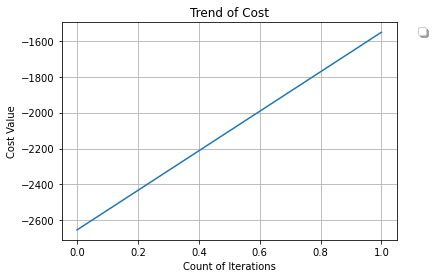

[0.00284137 0.01052424]
Accuracy was : 0.78125
Recall was :  1.0
Precision was :  0.78125


In [11]:
lr.fit()

In [12]:
rm_index_array=[0,38]

In [13]:
lr1=LogisticRegression(X_train,y_train,tolerance=0.0,index=rm_index_array,rem_idx=True )

Calling Remove Index


  0%|          | 1/5000 [00:00<00:04, 1191.90it/s]
No handles with labels found to put in legend.


The model stopped lesrning


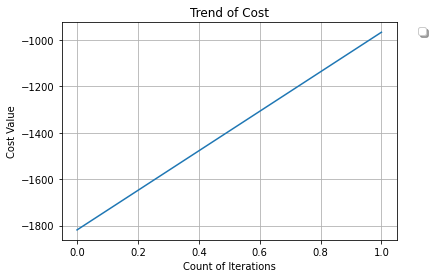

[0.00157769 0.0081994 ]
Accuracy was : 0.7333333333333333
Recall was :  1.0
Precision was :  0.7333333333333333


In [14]:
lr1.fit()

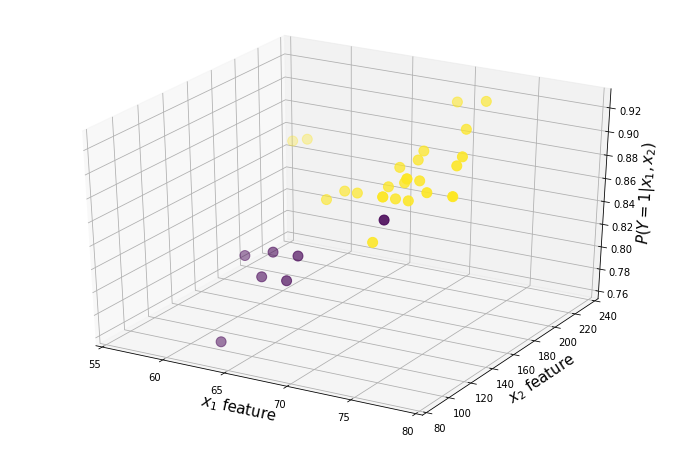

In [15]:
lr.plot()

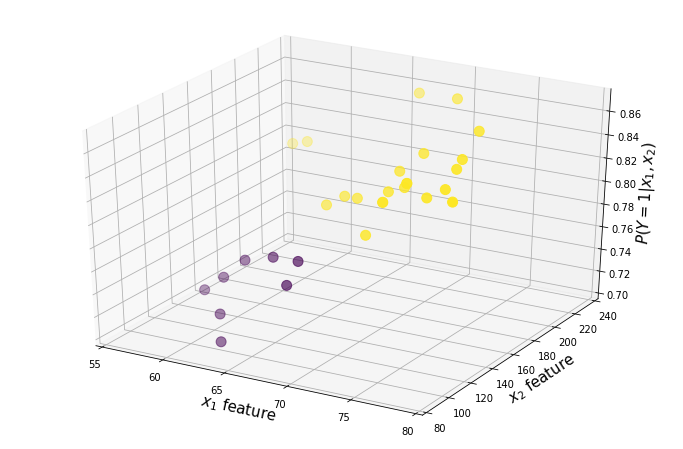

In [16]:
lr1.plot()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:128: UserWarning: No contour levels were found within the data range.


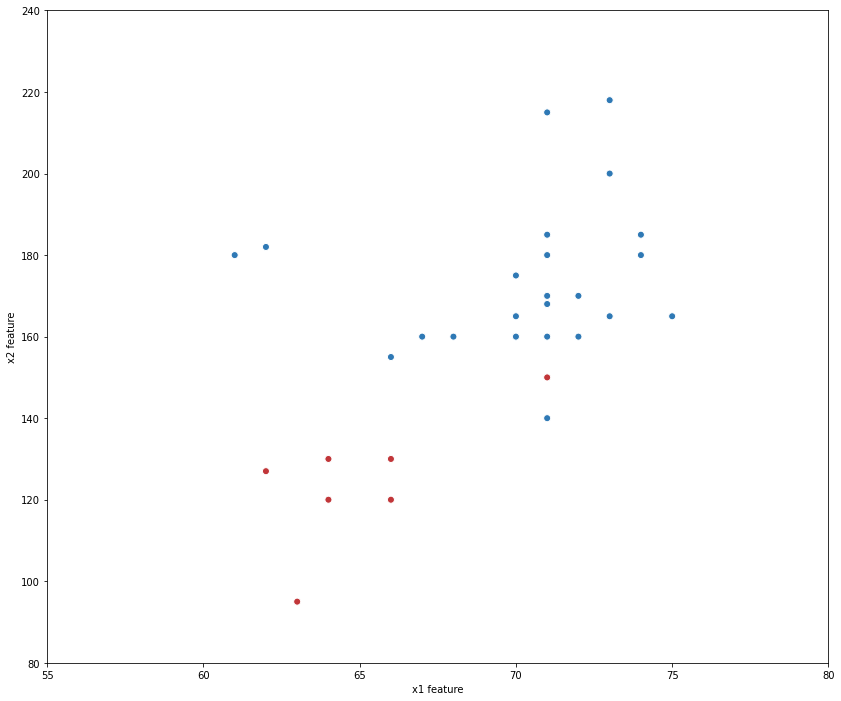

In [17]:
lr.scatterPlt()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:128: UserWarning: No contour levels were found within the data range.


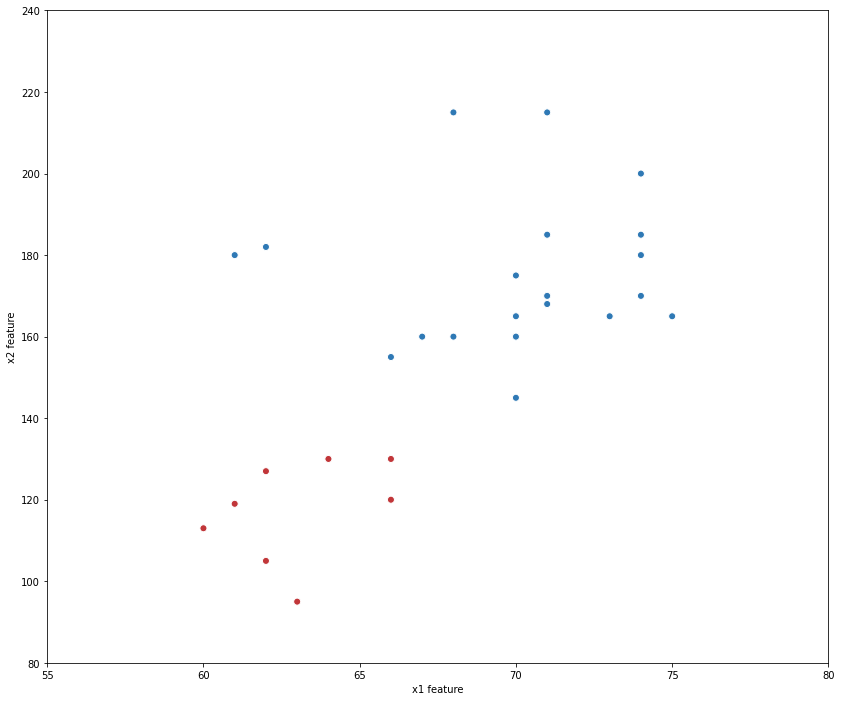

In [18]:
lr1.scatterPlt()

red-->0 blue-->1

In [19]:
train_df[0,:]

array([  1,  71, 140])

In [20]:
train_df[38,:]

array([  0,  71, 150])

PART 2
Explain why removing data point number 1 and 39 has a large effect on the predicted probability of the model:

Data point 1 --> (71,140)-->1 | Data Point 39--> (71,150)--> 0

Data point 39, or (71,150), resembles class 1 characteristics but was initially in class 0. Similar to data point 2, which initially belonged to class 1, data point 1 (71,140) exhibits traits similar to class 0. Both of these points are out of place in their respective classes and are quite close to the decision boundary. There are no points around the decision point that belong to the opposing class after these points are eliminated. As a result, a distinct decision boundary is established, and the likelihoods of further data points belonging to their class are raised, improving accuracy and precision.

In addition, when the decision boundary and the points are plotted, we can observe that: prior to the removal of outliers, one of the points belonging to x2 was in the incorrect boundry, which was an outlier and its removal caused the line to descend to a better position.

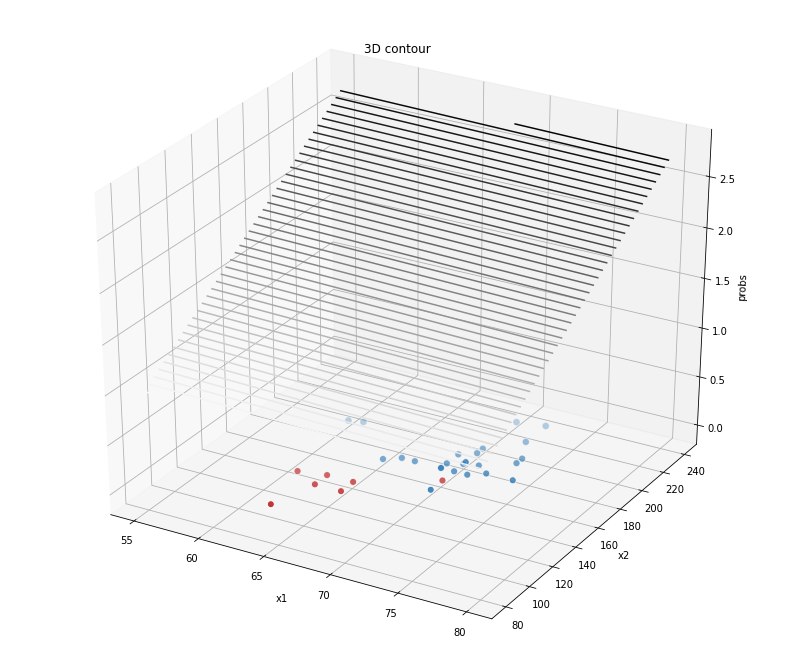

In [21]:
lr.plot3D()

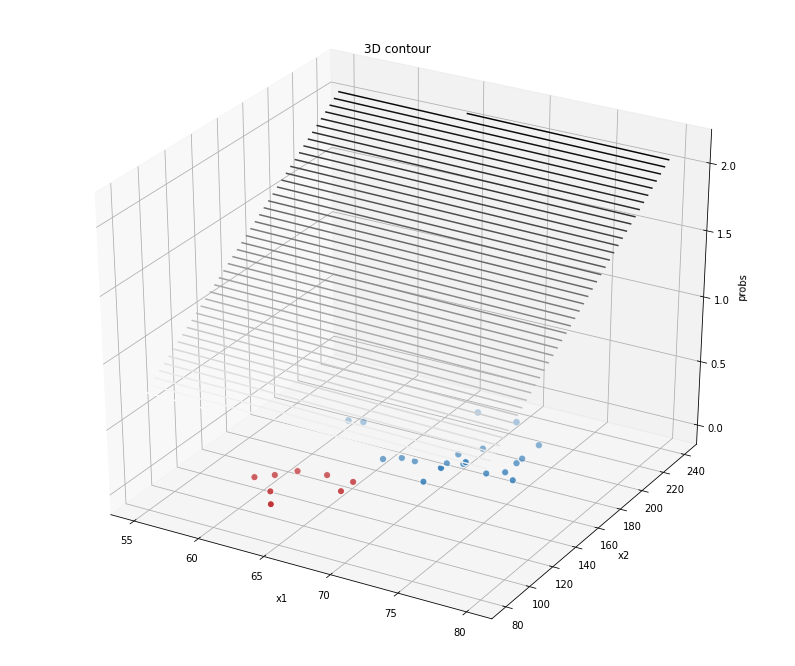

In [22]:
lr1.plot3D()